# 12. Data exploration - model (graphs)

In [1]:
sample_features_file <- "../preprocessed_data/sample_features_2019-09-05.feather"
sample_crude_file <- "../preprocessed_data/sample_features_crude_2019-09-07.feather"
sample_none_new_file <- "../preprocessed_data/sample_none_new_2019-09-02.feather"

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
# options(repr.plot.width=4, repr.plot.height=4, repr.plot.res=300)

In [4]:
today <- Sys.Date()

In [5]:
analysis_columns = c("YEAR", "COMMODITY", "OPERATOR_ID", "NAME", "inc_per_mile_3", "sign_inc_3", "MILES", "CHANGE", "sd_change_3", "sd_change_sq", "avg_1940", "avg_1950", "avg_1960", "avg_1970", 
                     "avg_1980", "avg_1990", "avg_2000", "avg_2010")

## Read data

In [6]:
sample <- feather::read_feather(sample_features_file)
sample_crude <- feather::read_feather(sample_crude_file)
sample_none_new <- feather::read_feather(sample_none_new_file)
glimpse(sample)

Observations: 1,357
Variables: 61
$ YEAR                  <dbl> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,…
$ COMMODITY             <fct> crude, hvl, non-hvl, crude, hvl, non-hvl, crude…
$ OPERATOR_ID           <fct> Sunoco (Group), Sunoco (Group), Sunoco (Group),…
$ NAME                  <chr> "Sunoco (Group)", "Sunoco (Group)", "Sunoco (Gr…
$ MILES                 <dbl> 4008.780, 1852.530, 1506.550, 92.377, 24.609, 1…
$ AGE_UNKNOWN_MILES     <dbl> 429.690, 185.430, 148.890, 0.000, 0.000, 0.000,…
$ MILES_PRE_1940        <dbl> 269.07, 4.73, 40.90, 0.00, 0.00, 0.00, 1.70, 0.…
$ MILES_1940            <dbl> 500.350, 174.050, 130.370, 0.000, 0.000, 0.000,…
$ MILES_1950            <dbl> 519.030, 134.220, 147.840, 84.333, 0.000, 11.23…
$ MILES_1960            <dbl> 190.830, 98.080, 114.860, 40.250, 52.120, 2.848…
$ MILES_1970            <dbl> 99.300, 126.410, 271.510, 0.000, 0.000, 25.322,…
$ MILES_1980            <dbl> 67.050, 14.970, 64.900, 18.896, 4.482, 10.925, …
$ MILES_1990      

## 12.1 Filter for complete cases

In [7]:
complete <- complete.cases(select(sample, analysis_columns))
analysis_sample <- sample[complete, ]
head(sample)

YEAR,COMMODITY,OPERATOR_ID,NAME,MILES,AGE_UNKNOWN_MILES,MILES_PRE_1940,MILES_1940,MILES_1950,MILES_1960,⋯,INCIDENTS_MILE,SIGN_INC_MILE,M_A_3,LOG_INCIDENTS_MILE,LOG_SIGN_INC_MILE,log_sd_change,sd_change_sq,sd_change_pw_3,one_over_sd_change,miles_x_change
<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018,crude,Sunoco (Group),Sunoco (Group),4008.780,429.69,269.07,500.35,519.030,190.830,⋯,0.004989049,0.0019956196,1,-5.300510,-6.216801,7.3128616,2.248386e+06,3.371369e+09,0.0006669059,6011012.7441
2018,hvl,Sunoco (Group),Sunoco (Group),1852.530,185.43,4.73,174.05,134.220,98.080,⋯,0.001079605,0.0010796046,1,-6.831160,-6.831160,5.8697210,1.254223e+05,4.441833e+07,0.0028236611,656073.7657
2018,non-hvl,Sunoco (Group),Sunoco (Group),1506.550,148.89,40.90,130.37,147.840,114.860,⋯,0.001327536,0.0006637682,1,-6.624430,-7.317578,4.5935971,9.771197e+03,9.658766e+05,0.0101164029,148921.5107
2018,crude,Valero Energy (Group),Valero Energy (Group),92.377,0.00,0.00,0.00,84.333,40.250,⋯,0.000000000,0.0000000000,1,-Inf,-Inf,0.3477542,2.004728e+00,2.838463e+00,0.7062724599,130.7951
2018,hvl,Valero Energy (Group),Valero Energy (Group),24.609,0.00,0.00,0.00,0.000,52.120,⋯,0.000000000,0.0000000000,1,-Inf,-Inf,1.7479471,3.297976e+01,1.893962e+02,0.1741310555,141.3246
2018,non-hvl,Valero Energy (Group),Valero Energy (Group),170.415,0.00,0.00,0.00,11.233,2.848,⋯,0.005868028,0.0058680280,1,-5.138237,-5.138237,4.1117566,3.727575e+03,2.275829e+05,0.0163789784,10404.4951


## 12.2 Check consistency pre-2010 and post-2010

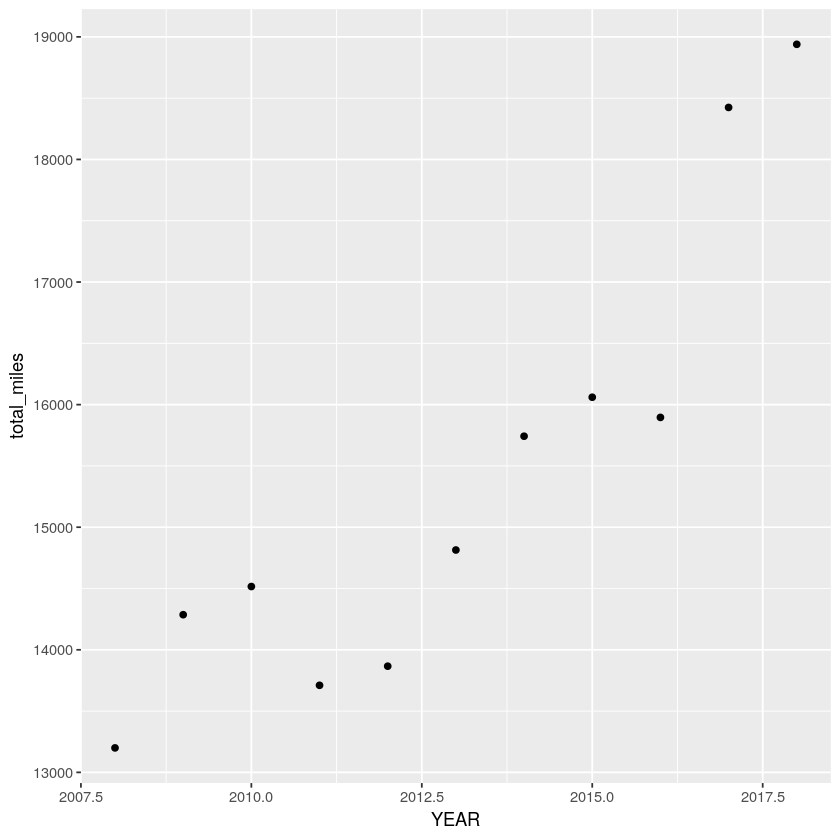

In [8]:
sample %>%
    filter(!is.na(MILES)) %>%
    filter(COMMODITY == "crude") %>%
    group_by(YEAR) %>%
    summarize(total_miles = sum(MILES)) %>%
    ggplot(aes(x=YEAR, y = total_miles)) +
        geom_point()
        

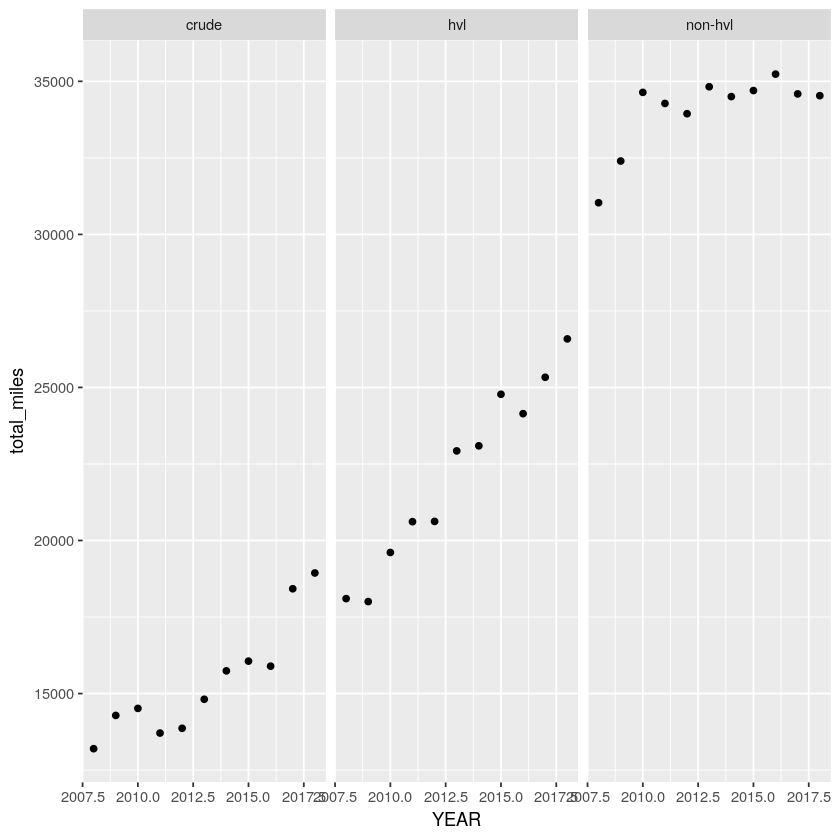

In [9]:
sample %>%
    filter(!is.na(MILES)) %>%
    group_by(COMMODITY, YEAR) %>%
    summarize(total_miles = sum(MILES)) %>%
    ggplot(aes(x=YEAR, y = total_miles)) +
        geom_point() +
        facet_wrap(.~COMMODITY)

## 12.3 Create FE-like variables

In [10]:
analysis_sample <- analysis_sample %>%
    group_by(YEAR, COMMODITY) %>%
    arrange(desc(YEAR)) %>%
    mutate(FE_INCIDENTS = (sign_inc_3/MILES) - (lead(sign_inc_3)/lead(MILES)), 
           FE_SD = sd_change_3 - lead(sd_change_3)) %>%
    ungroup()

Warning message:
“Removed 22 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 22 rows containing missing values (geom_point).”

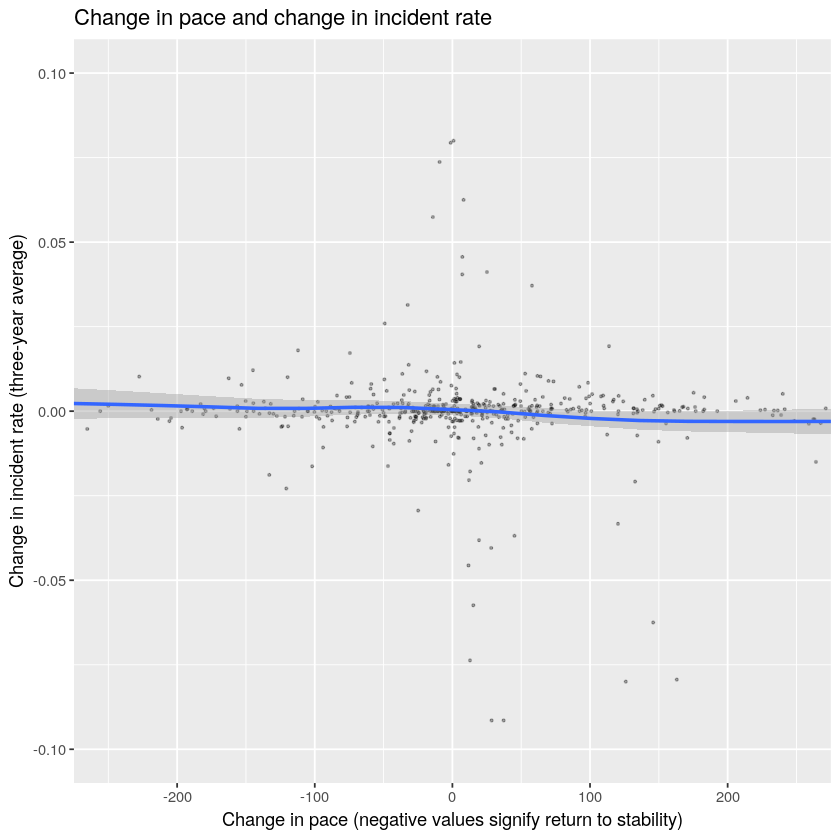

In [11]:
analysis_sample %>%
    # filter(abs(FE_SD) < 250) %>%
    ggplot(aes(x=FE_SD, y=FE_INCIDENTS)) +
        geom_jitter(size=0.5, alpha=0.3) +
        geom_smooth(method='loess') +
        coord_cartesian(ylim=c(-0.1, 0.1), xlim = c(-250, 250)) +
        labs(title = "Change in pace and change in incident rate", 
             x = "Change in pace (negative values signify return to stability)", 
             y = "Change in incident rate (three-year average)")

## 12.3.1 What are the outliers

In [12]:
analysis_sample %>%
    filter(FE_INCIDENTS > 0.07) %>%
    select(analysis_columns, FE_INCIDENTS, FE_SD)

YEAR,COMMODITY,OPERATOR_ID,NAME,inc_per_mile_3,sign_inc_3,MILES,CHANGE,sd_change_3,sd_change_sq,avg_1940,avg_1950,avg_1960,avg_1970,avg_1980,avg_1990,avg_2000,avg_2010,FE_INCIDENTS,FE_SD
<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016,crude,22430,WEST SHORE PIPELINE CO,0.09305788,0.3333333,3.582,0.00,0.000000,0.00000,0,0.9921831379,0.006420994,0.0000000,0.0000000,0.0000000,0.0000000,0.001395868,0.09076784,-288.4207518
2015,crude,22430,WEST SHORE PIPELINE CO,0.09305788,0.3333333,3.582,0.00,0.000000,0.00000,0,0.9921831379,0.006420994,0.0000000,0.0000000,0.0000000,0.0000000,0.001395868,0.09180616,-401.2179141
2013,non-hvl,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",0.07361060,4.0000000,54.270,0.10,7.764739,60.29117,0,0.0295130038,0.000000000,0.2586073,0.1550218,0.2453520,0.2367064,0.074799559,0.07370555,-9.2934404
2012,non-hvl,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",0.07376724,4.3333333,54.170,-0.41,9.857657,97.17339,0,0.0007153076,0.000000000,0.1954794,0.1741104,0.2931211,0.2820340,0.054539725,0.07999508,0.8133213
2011,non-hvl,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",0.06878307,4.3333333,54.580,-12.90,9.533913,90.89550,0,0.0000000000,0.000000000,0.2172438,0.2050438,0.3179052,0.2329989,0.026808283,0.07939416,-1.2387544


## 13.4 Distribution of incidents in sample

Warning message:
“Removed 103 rows containing non-finite values (stat_bin).”

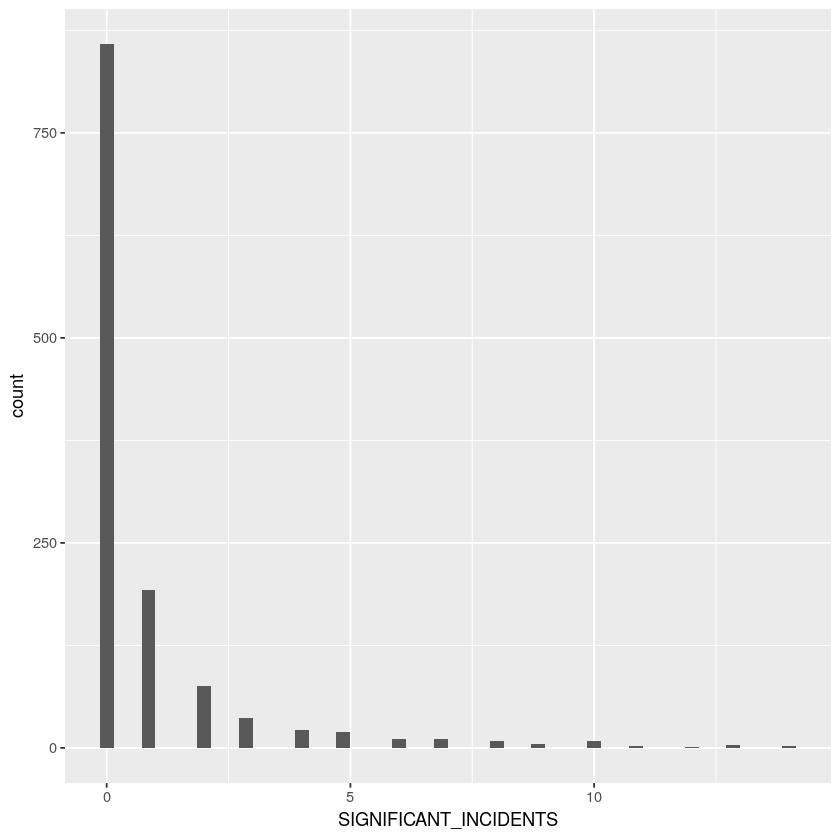

In [13]:
sample %>%
    ggplot(aes(x=SIGNIFICANT_INCIDENTS)) +
        geom_histogram(bins=50)

Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1923 rows containing non-finite values (stat_bin).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 21 rows containing missing values (geom_bar).”

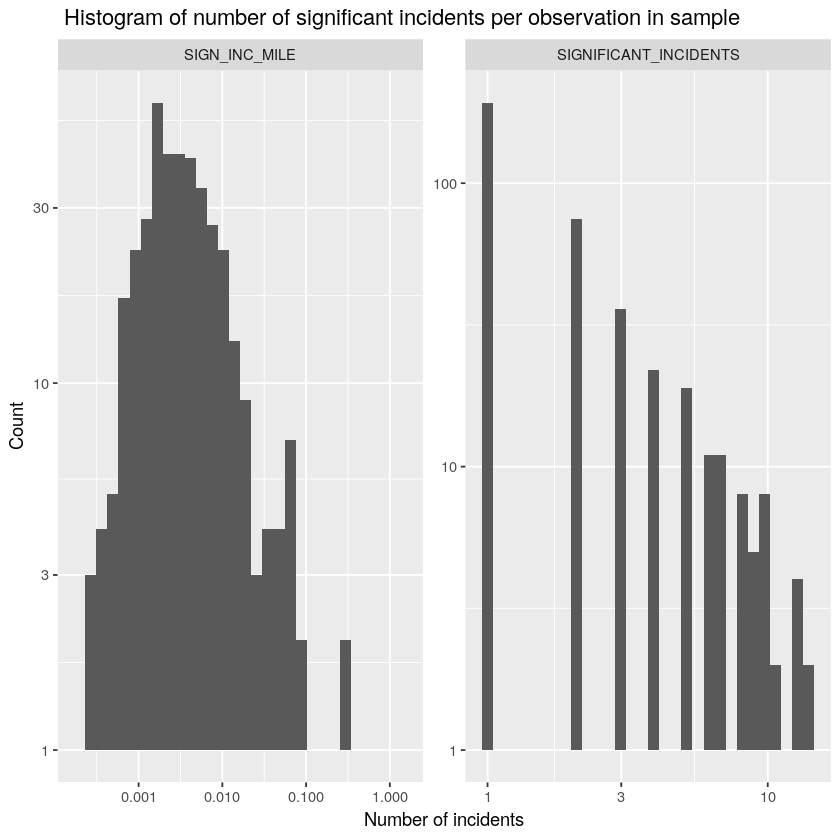

In [14]:
sample %>%
    select(SIGNIFICANT_INCIDENTS, SIGN_INC_MILE) %>%
    gather(SIGNIFICANT_INCIDENTS, SIGN_INC_MILE, key="variable", value="value") %>%
    ggplot(aes(x=value)) +
        geom_histogram() + 
        facet_wrap(~ variable, scales="free") +
        scale_y_log10() +
        scale_x_log10() +
        labs(title = " Histogram of number of significant incidents per observation in sample", x = "Number of incidents", y="Count")

Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1923 rows containing non-finite values (stat_bin).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 83 rows containing missing values (geom_bar).”

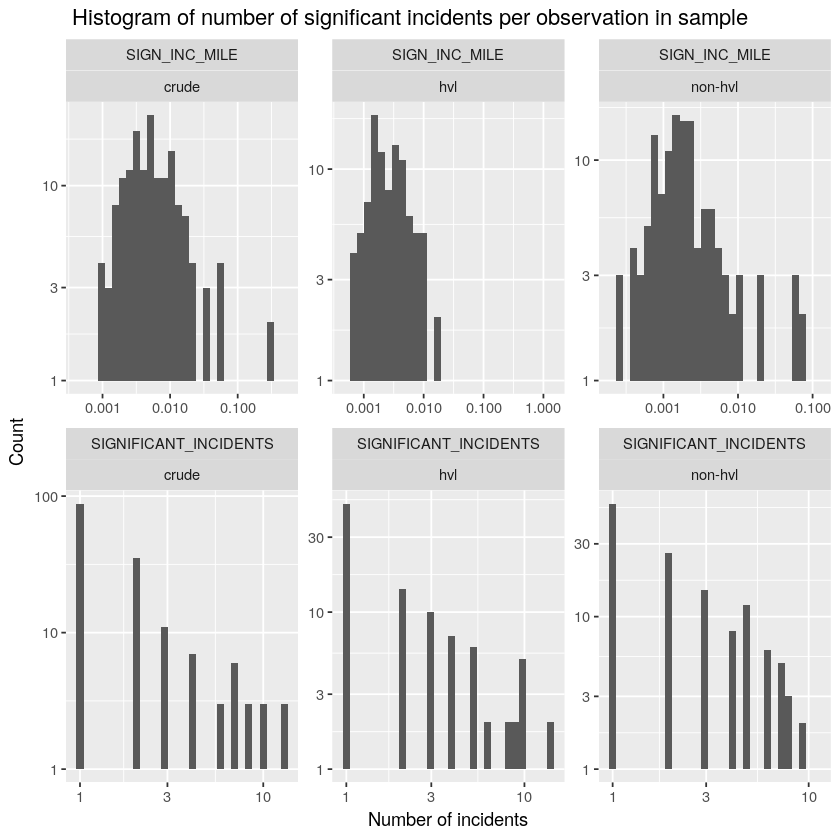

In [15]:
sample %>%
    select(SIGNIFICANT_INCIDENTS, SIGN_INC_MILE, COMMODITY) %>%
    gather(SIGNIFICANT_INCIDENTS, SIGN_INC_MILE, key="variable", value="value") %>%
    ggplot(aes(x=value)) +
        geom_histogram() + 
        facet_wrap(variable ~ COMMODITY, scales="free") +
        scale_y_log10() +
        scale_x_log10() +
        labs(title = " Histogram of number of significant incidents per observation in sample", x = "Number of incidents", y="Count")

Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1923 rows containing non-finite values (stat_bin).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 288 rows containing missing values (geom_bar).”

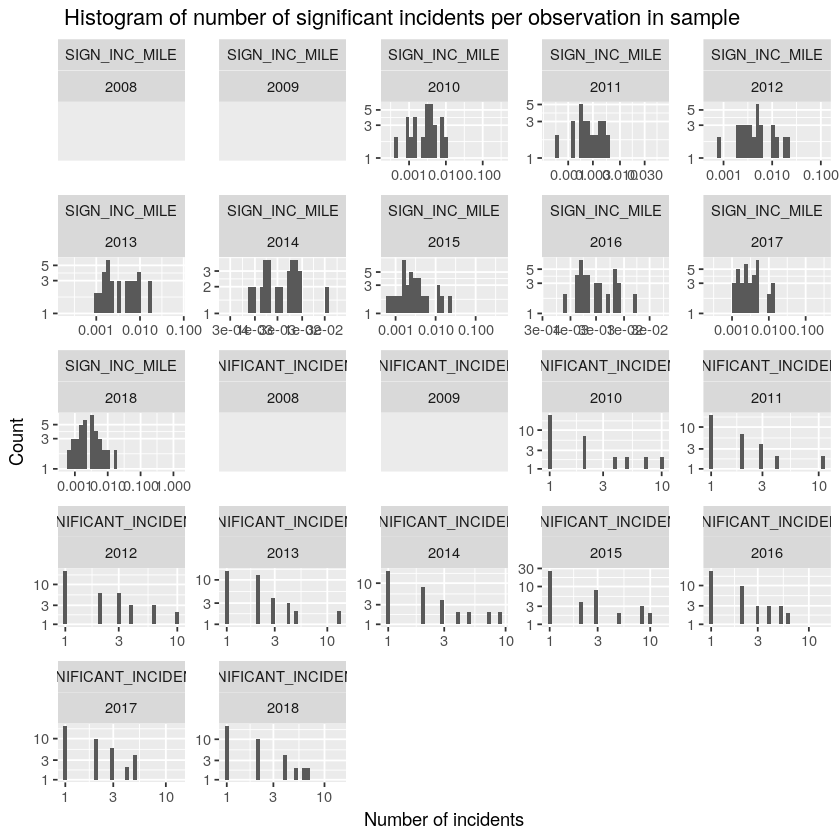

In [16]:
sample %>%
    select(SIGNIFICANT_INCIDENTS, SIGN_INC_MILE, YEAR) %>%
    gather(SIGNIFICANT_INCIDENTS, SIGN_INC_MILE, key="variable", value="value") %>%
    ggplot(aes(x=value)) +
        geom_histogram() + 
        facet_wrap(variable ~ YEAR, scales="free") +
        scale_y_log10() +
        scale_x_log10() +
        labs(title = " Histogram of number of significant incidents per observation in sample", x = "Number of incidents", y="Count")

## 12.5 Trend - incidents per year

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

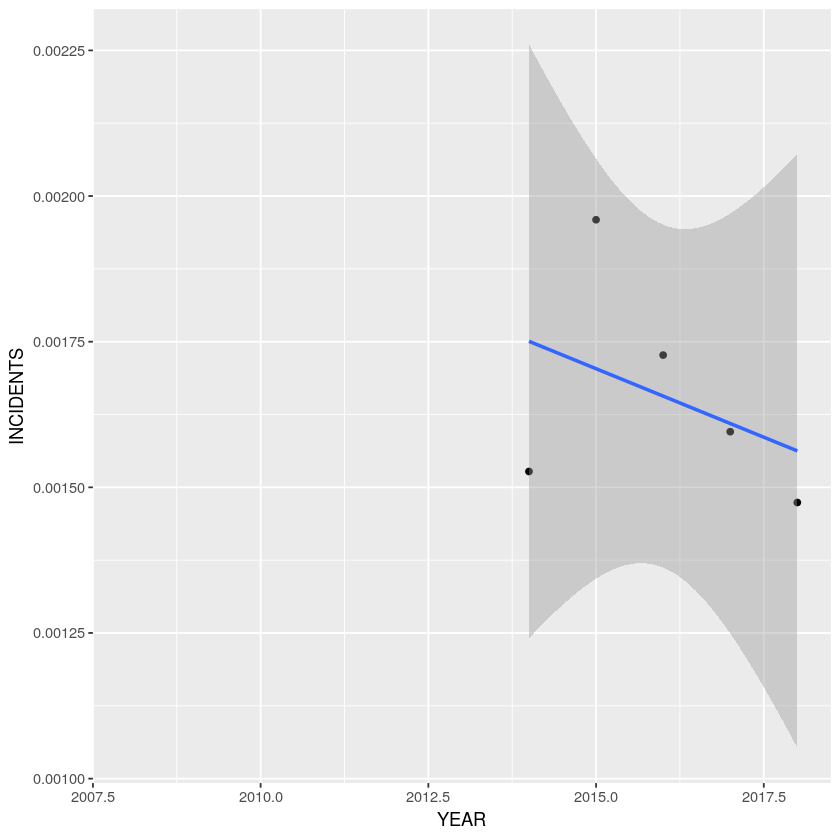

In [17]:
sample %>%
    group_by(YEAR) %>%
    summarize(INCIDENTS = sum(SIGNIFICANT_INCIDENTS)/ sum(MILES)) %>%
    ggplot(aes(x=YEAR, y=INCIDENTS)) +
        geom_point() +
        geom_smooth(method='lm')